<a href="https://colab.research.google.com/github/toaomalkster/conscious-calculator-notebooks/blob/main/NumberAdder_0_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Number Adder
0.6:
* Extension of capabilities to force more interesting usage of the loop capability:
   * Extra input node/s to indicate which operation to apply.
   * Some operations will be more efficiently done by using one loop iteration to compute an intermediate result. So should see that used loop length will vary depending on operation.
   * Note that some of these operations will require a deeper network.
* Some operations to consider:
   * 'equal' - just passes 'a' input as output
   * 'sum'
   * 'add and double'
   * 'sum of add and multiply' - a+b + a*b

## Background
Building up towards a model based on Consciousness V2 theory.

## Loss Function Considerations
Non-negotiables:
* Must produce the correct result at some point
* Must not falsely represent the result -- ie: if there is a 'completion' flag, then it must always be close to zero if not outputting the result

Fuzzy requirements:
* Accuracy is more important than efficiency
* Needs to identify 'completion' somehow

Ideal optimisation requirements:
* Minimise effort to produce result
  * Optimises for quicker response times
  * Also a protection against infinite loops

**App Boilerplate**

In [ ]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import time

print(tf.__version__)


2.3.0


# Setup Training Data

In [ ]:
data = np.random.randint(100, size=(1000, 2)).astype('float32')
data[0:10,:]

array([[ 5., 77.],
       [ 1., 87.],
       [41.,  0.],
       [62., 82.],
       [15., 16.],
       [96.,  3.],
       [56., 93.],
       [80., 29.],
       [68., 94.],
       [74., 33.]], dtype=float32)

In [ ]:
data_labels = (data[:,0] + data[:,1])[:,np.newaxis]
data_labels[0:10,:]

array([[ 82.],
       [ 88.],
       [ 41.],
       [144.],
       [ 31.],
       [ 99.],
       [149.],
       [109.],
       [162.],
       [107.]], dtype=float32)

# Setup Model

In [ ]:
statusNodes=1
outputNodes=1
feedbackNodes=5
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(2+feedbackNodes,)),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(statusNodes + outputNodes + feedbackNodes)
])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1000)              8000      
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 7007      
Total params: 15,007
Trainable params: 15,007
Non-trainable params: 0
_________________________________________________________________


# Setup Training
Running equivalent of:
```
# fitres = model.fit(data, data_labels, validation_split=0.2, shuffle=True, epochs=150)
```

Trained to run with loop length 5, and asked to calculate 78 + 14, gives the following sub-results:
```
(tbd)
```
And the following final result:
```
(tbd)
```

In [ ]:
loss = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
a_true = tf.ones(shape=(5, 1))
a_preds = tf.constant([
                       [[0.0], [0.8], [0.9]],
                       [[1.0], [1.1], [1.2]],
                       [[2.0], [2.1], [2.2]],
                       [[2.5], [0.1], [0.2]],
                       [[0.5], [0.2], [0.4]]
])

#print(a_true)
#print(a_preds)
#loss(a_true, a_preds)
#a_preds[0]
#a_preds.shape

#loss(a_true, a_preds[:,1,...])
#loss(a_true, a_preds)

print(f'a_preds.shape={a_preds.shape}')
#tf.unstack(a_preds, axis=1)[0]
l0 = loss(a_true, tf.unstack(a_preds, axis=1)[0])
l1 = loss(a_true, tf.unstack(a_preds, axis=1)[1])
print(l0)
print(l1)
#tf.stack([l0,l1],axis=1)
#tf.stack([[i*2] for i in range(0,5)])
#tf.map_fn(fn=lambda y_pred: loss(y_true, y_pred), elems=tf.unstack(a_preds, axis=1), fn_output_signature=tf.float32)

losses = tf.stack([loss(y_true, y_pred) for y_pred in tf.unstack(a_preds, axis=1)], axis=1)
print(f'losses.shape={losses.shape}')

a_preds.shape=(5, 3, 1)
tf.Tensor([1.   0.   1.   2.25 0.25], shape=(5,), dtype=float32)
tf.Tensor([0.04       0.01       1.2099998  0.80999994 0.64000005], shape=(5,), dtype=float32)
losses.shape=(5, 3)


In [ ]:
# statuses
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
a_true = tf.one_hot([2, 2, 1, 2, 0], 3, on_value=10.0, off_value=0.0)
a_preds = tf.constant([
                       [[0.0, 0.0], [1.0, 0.8], [3.0, 0.9]],
                       [[0.0, 1.0], [1.0, 1.1], [3.0, 1.2]],
                       [[0.0, 2.2], [1.0, 2.1], [3.0, 2.3]],
                       [[0.0, 2.5], [1.0, 0.1], [3.0, 0.2]],
                       [[0.0, 0.5], [1.0, 0.2], [3.0, 0.4]]
])

#tf.unstack(a_preds, axis=1)[0]
print(f'true:\n{a_true}')
print(f'preds:\n{a_preds[:,:,0]}')
mse(a_true, a_preds[:,:,0])

true:
[[ 0.  0. 10.]
 [ 0.  0. 10.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]
 [10.  0.  0.]]
preds:
[[0. 1. 3.]
 [0. 1. 3.]
 [0. 1. 3.]
 [0. 1. 3.]
 [0. 1. 3.]]


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([16.666666, 16.666666, 30.      , 16.666666, 36.666668],
      dtype=float32)>

In [ ]:
# selecting from statuses
a_preds = tf.constant([
                       [[0.0, 0.0], [1.0, 0.8], [3.0, 0.9]],
                       [[0.0, 1.0], [1.0, 1.1], [3.0, 1.2]],
                       [[0.0, 2.2], [1.0, 2.1], [3.0, 2.3]],
                       [[0.0, 2.5], [1.0, 0.1], [3.0, 0.2]],
                       [[0.0, 0.5], [1.0, 0.2], [3.0, 0.4]]
])
b = tf.unstack(a_preds, axis=0)[0]
print(f'b: {b}')

tf.stack([tf.argmax(tf.map_fn(fn=lambda t: 0 if t[0] < 1.0 else 1.0, elems=b)) for b in tf.unstack(a_preds, axis=0)], axis=0)

b: [[0.  0. ]
 [1.  0.8]
 [3.  0.9]]


<tf.Tensor: shape=(5,), dtype=int64, numpy=array([1, 1, 1, 1, 1])>

In [ ]:
mse = tf.keras.losses.MeanSquaredError(reduction=tf.keras.losses.Reduction.NONE)
a_true = tf.ones(shape=(5, 1))
a_preds = tf.constant([
                       [[0.0, 0.0], [1.0, 0.8], [3.0, 0.9]],
                       [[0.0, 1.0], [1.0, 1.1], [3.0, 1.2]],
                       [[0.0, 2.2], [1.0, 2.1], [3.0, 2.3]],
                       [[0.0, 2.5], [1.0, 0.1], [3.0, 0.2]],
                       [[0.0, 0.5], [1.0, 0.2], [3.0, 0.4]]
])


#@tf.function
def multiIterationLoss(y_true, y_preds):
  """Computes re-inforcement loss across loop execution.

  Args:
    y_true: Ground truth values.
            Expected outcome, excluding status or feedback nodes.
            shape = `(batch_size, output_nodes)`.
    y_preds: The predicted values across all iterations of the loop.
            Includes status, but excludes feedback nodes.
            shape = `(batch_size, loop_size, status_nodes + output_nodes)`.

  Returns:
    Mean absolute squares values. shape = `(1)`.
  """

  # REMEMBER: all operations are actioned ACROSS the whole batch

  # Plan:
  #  Loss Part A: must produce correct result it at least one iteration
  #  Loss Part B: must yield >1.0 status against best result
  #  Loss Part C: must NOT yield >1.0 status against wrong results
  iterationCount = y_preds.shape[1]

  # Collect losses across batch and iterations
  # maps: y_preds(bs, ls, sn+on) -> losses(bs, ls)    // ignoring status_nodes
  # (note: mse is batch aware but configured to NOT sum across the batch,
  #  so we'll need to manually do that sum at the end)
  losses = tf.stack([
                     mse(y_true, y_pred[:,1:, ...])
                     for y_pred in tf.unstack(y_preds, axis=1)],
                    axis=1)
  print(f'output losses across batch and iterations:\n{losses}')

  # Loss Part A: must produce correct result it at least one iteration
  # (so take min loss across iterations)
  # (note: argmin biases towards earlier indices if there are duplicates)
  minLossIndices = tf.argmin(losses, axis=1)
  minLoss        = tf.gather(losses, minLossIndices, batch_dims=1, axis=1)
  print(f'min output loss per-batch (indices {minLossIndices}):\n{minLoss}')

  # Loss Part B: must yield >=1.0 status against best result
  # Loss Part C: must NOT yield >=1.0 status against wrong results
  status_true = tf.one_hot(minLossIndices, iterationCount, on_value=10.0, off_value=0.0)
  print(f'status: {status_true}')
  statusLoss = mse(status_true, y_preds[:,:,0])
  print(f'status losses per-batch: \n{statusLoss}')

  # combine losses
  batchLoss = tf.reduce_sum([tf.reduce_sum(minLoss), tf.reduce_sum(statusLoss)])
  print(f'batch output loss: {tf.reduce_sum(minLoss)}')
  print(f'batch status loss: {tf.reduce_sum(statusLoss)}')
  print(f'batch loss:        {batchLoss}')
  return batchLoss

print(multiIterationLoss(a_true, a_preds))

output losses across batch and iterations:
[[1.         0.04       0.01      ]
 [0.         0.01       0.04000002]
 [1.44       1.2099998  1.6899998 ]
 [2.25       0.80999994 0.64000005]
 [0.25       0.64000005 0.36      ]]
min output loss per-batch (indices [2 0 1 2 0]):
[0.01       0.         1.2099998  0.64000005 0.25      ]
status: [[ 0.  0. 10.]
 [10.  0.  0.]
 [ 0. 10.  0.]
 [ 0.  0. 10.]
 [10.  0.  0.]]
status losses per-batch: 
[16.666666 36.666668 30.       16.666666 36.666668]
batch output loss: 2.109999895095825
batch status loss: 136.6666717529297
batch loss:        138.77667236328125
tf.Tensor(138.77667, shape=(), dtype=float32)


In [ ]:
optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

# Returns: y_preds - list of preds, where each y_pred is a tensor of shape = `(batch_size, d0, .. dN)`.
@tf.function
def compute(inputs, max_loop_length, training=False):
  batchSize = inputs.shape[0]
  outputs = []
  feedback = tf.zeros(shape=(batchSize, feedbackNodes))

  for i in range(max_loop_length):
    # extend width of inputs with zeroed-out feedback
    if i == 0:
      inputsWithFeedback = tf.concat([inputs, feedback], axis=1)
    else:
      zeroedInputs = tf.zeros(shape=inputs.shape)
      inputsWithFeedback = tf.concat([zeroedInputs, feedback], axis=1)
  
    # run model with inputs + feedback nodes
    output = model(inputsWithFeedback, training)

    # copy feedback for next iteration
    feedback = output[:,-feedbackNodes:]

    # produce output for records
    # (note: doesn't use TF functions so don't re-use any of this for next iteration)
    outputs.append(output[:,:-feedbackNodes])

  return tf.stack(outputs, axis=1)

# Picks first where statusNode >=1.0; otherwise returns None
def predict(inputs, max_loop_length, training=False):
  # pick last iteration's output only and omit status nodes
  outputs = compute(inputs, max_loop_length, training)

  preds = []
  for b in tf.unstack(outputs, axis=0):
    #print(f'batch:\n{b}')
    statuses = tf.map_fn(fn=lambda t: 0 if t[0] < 1.0 else 10.0, elems=b)
    if tf.reduce_max(statuses) > 1.0:
      index = tf.argmax(statuses)
      preds.append(b[index,1:])
      #print(f' result: max={tf.reduce_max(statuses)}, index={tf.argmax(statuses)} -> append: {b[index,1:]}')
    else:
      preds.append(None)
      #print(f' result: max={tf.reduce_max(statuses)}')
  return tf.stack(preds, axis=0)

@tf.function
def train_step(inputs, expected, max_loop_length):
  with tf.GradientTape() as tape:
    outputs = compute(inputs, max_loop_length, training=True)

    # calculate loss ignoring feedback output
    loop_loss = multiIterationLoss(expected, outputs)

    # train model
    gradients = tape.gradient(loop_loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))
    return loop_loss


In [ ]:
def fit(train_data, train_labels, epochs, batch_size, max_loop_length):
  res = {}
  res['loss'] = []

  for epoch in range(epochs):
    print ('Epoch: {}/{}'.format(epoch+1, epochs))
    start = time.time()
    sum_loss = 0

    # Train in batches
    mx = (int(len(train_data)/batch_size))*batch_size
    n  = mx/batch_size
    print ('[', end='')
    for i in range(0, mx, batch_size):
      batch_data   = train_data[i:i+batch_size]
      batch_labels = train_labels[i:i+batch_size]
      sum_loss += train_step(batch_data, batch_labels, max_loop_length)
      print ('=', end='')
    print('] - {} sec - loss: {}'.format(time.time()-start, sum_loss/n))

    # Record history
    res['loss'].append(sum_loss/n)

  return res

# Run Training

In [ ]:
fitres = fit(data, data_labels, epochs=1000, batch_size=32, max_loop_length=5)

Epoch: 1/1000
[output losses across batch and iterations:
Tensor("stack:0", shape=(32, 5), dtype=float32)
min output loss per-batch (indices Tensor("ArgMin:0", shape=(32,), dtype=int64)):
Tensor("GatherV2:0", shape=(32,), dtype=float32)
status: Tensor("one_hot:0", shape=(32, 5), dtype=float32)
status losses per-batch: 
Tensor("mean_squared_error_5/weighted_loss/Mul:0", shape=(32,), dtype=float32)
batch output loss: Tensor("Sum_3:0", shape=(), dtype=float32)
batch status loss: Tensor("Sum_4:0", shape=(), dtype=float32)
batch loss:        Tensor("Sum_2:0", shape=(), dtype=float32)
output losses across batch and iterations:
Tensor("stack:0", shape=(32, 5), dtype=float32)
min output loss per-batch (indices Tensor("ArgMin:0", shape=(32,), dtype=int64)):
Tensor("GatherV2:0", shape=(32,), dtype=float32)
status: Tensor("one_hot:0", shape=(32, 5), dtype=float32)
status losses per-batch: 
Tensor("mean_squared_error_5/weighted_loss/Mul:0", shape=(32,), dtype=float32)
batch output loss: Tensor("Su

# Results

In [ ]:
print(['x', 'y', 'expected', 'actual'])
print(np.concatenate((data[800:810], data_labels[800:810], predict(data[800:810], 5)), axis=1))

['x', 'y', 'expected', 'actual']
[[ 33.       68.      101.      101.03841]
 [ 17.       13.       30.       30.01556]
 [ 35.       96.      131.      131.06386]
 [ 36.       62.       98.       98.03688]
 [ 65.       26.       91.       91.10667]
 [ 57.       87.      144.      144.0733 ]
 [ 78.       77.      155.      155.11429]
 [  7.       85.       92.       92.05056]
 [ 45.       33.       78.       78.07259]
 [ 34.       84.      118.      118.05524]]


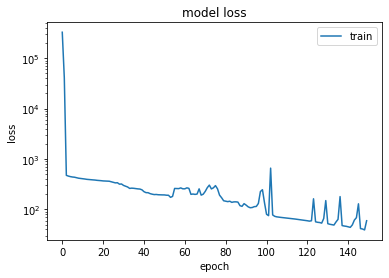

In [ ]:
plt.semilogy(fitres['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

# Analysis

In [ ]:
#c = compute(data[800:810], 6)
#for b in tf.unstack(c, axis=0):
#  for it in tf.unstack(b, axis=0):


In [ ]:
print(compute(data[800:810], 6))

tf.Tensor(
[[[ 9.9878569e+00  1.0103841e+02]
  [ 2.1664500e-03  2.6570940e+00]
  [ 2.2638440e-03  8.1952083e-01]
  [ 8.3869696e-04  6.6641688e-01]
  [ 5.9407949e-04  6.6178602e-01]
  [ 7.7921152e-04  6.6151106e-01]]

 [[ 1.0017448e+01  3.0015560e+01]
  [-1.5600920e-03  1.1182870e+00]
  [-2.1404028e-04  6.5373570e-01]
  [ 7.3671341e-04  6.6051042e-01]
  [ 1.0154247e-03  6.6144168e-01]
  [ 7.3564053e-04  6.6150486e-01]]

 [[ 1.0020744e+01  1.3106386e+02]
  [ 4.9233437e-05  3.4401510e+00]
  [ 2.5045872e-03  9.5143670e-01]
  [ 8.5759163e-04  6.7025167e-01]
  [ 3.5983324e-04  6.6181201e-01]
  [ 7.9071522e-04  6.6154087e-01]]

 [[ 1.0016863e+01  9.8036880e+01]
  [ 4.8911572e-03  2.5353591e+00]
  [ 1.5535355e-03  8.0410814e-01]
  [ 6.6345930e-04  6.6608417e-01]
  [ 6.2072277e-04  6.6177487e-01]
  [ 7.7491999e-04  6.6151017e-01]]

 [[ 1.0039879e+01  9.1106667e+01]
  [ 6.8730116e-04  2.3943162e+00]
  [-3.4111738e-04  7.6752341e-01]
  [ 5.1492453e-04  6.6470307e-01]
  [ 7.0643425e-04  6.6175276e

In [ ]:
predict(data[800:810], 6)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[101.03841],
       [ 30.01556],
       [131.06386],
       [ 98.03688],
       [ 91.10667],
       [144.0733 ],
       [155.11429],
       [ 92.05056],
       [ 78.07259],
       [118.05524]], dtype=float32)>